In [1]:
!git clone https://github.com/jbshp/GenCompareSum.git

Cloning into 'GenCompareSum'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (302/302), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 302 (delta 64), reused 279 (delta 42), pack-reused 0
Receiving objects: 100% (302/302), 3.29 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [3]:
#edit
!pip3 install -r /content/GenCompareSum/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/GenCompareSum/src/bert_score (from -r /content/GenCompareSum/requirements.txt (line 1))
Obtaining pyrouge from git+https://github.com/bheinzerling/pyrouge@08e9cc35d713f718a05b02bf3bb2e29947d436ce#egg=pyrouge (from -r /content/GenCompareSum/requirements.txt (line 7))
  Cloning https://github.com/bheinzerling/pyrouge (to revision 08e9cc35d713f718a05b02bf3bb2e29947d436ce) to ./src/pyrouge
  Running command git clone -q https://github.com/bheinzerling/pyrouge /content/src/pyrouge
  Running command git rev-parse -q --verify 'sha^08e9cc35d713f718a05b02bf3bb2e29947d436ce'
  Running command git fetch -q https://github.com/bheinzerling/pyrouge 08e9cc35d713f718a05b02bf3bb2e29947d436ce
     |████████████████████████████████| 112 kB 10.3 MB/s 
     |████████████████████████████████| 1.5 MB 53.5 MB/s 
     |████████████████████████████████| 14.8 MB 49.5 MB/s 
     |██████████

In [1]:
!git clone https://github.com/andersjo/pyrouge.git /content/GenCompareSum/src/rouge

Cloning into '/content/GenCompareSum/src/rouge'...
remote: Enumerating objects: 393, done.
remote: Total 393 (delta 0), reused 0 (delta 0), pack-reused 393
Receiving objects: 100% (393/393), 298.74 KiB | 11.49 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [2]:
!pyrouge_set_rouge_path /content/GenCompareSum/src/rouge/tools/ROUGE-1.5.5

2022-09-27 18:49:18,505 [MainThread  ] [INFO ]  Set ROUGE home directory to /content/GenCompareSum/src/rouge/tools/ROUGE-1.5.5.


In [3]:
!sudo apt-get install libxml-parser-perl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl
  libio-socket-ssl-perl liblwp-mediatypes-perl liblwp-protocol-https-perl
  libmailtools-perl libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl
  libtimedate-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl netbase perl-openssl-defaults
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libauthen-ntlm-perl
The following NEW packag

In [4]:
!git clone https://github.com/tagucci/pythonrouge.git

Cloning into 'pythonrouge'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 314 (delta 0), reused 1 (delta 0), pack-reused 309
Receiving objects: 100% (314/314), 362.05 KiB | 8.23 MiB/s, done.
Resolving deltas: 100% (139/139), done.


In [5]:
!rm -rf /content/GenCompareSum/src/rouge/tools/ROUGE-1.5.5/data/WordNet-2.0.exc.db file
!/content/pythonrouge/pythonrouge/RELEASE-1.5.5/data/WordNet-2.0-Exceptions/buildExeptionDB.pl /content/pythonrouge/pythonrouge/RELEASE-1.5.5/data/WordNet-2.0-Exceptions /content/pythonrouge/pythonrouge/RELEASE-1.5.5/data/smart_common_words.txt /content/GenCompareSum/src/rouge/tools/ROUGE-1.5.5/data/WordNet-2.0.exc.db

In [6]:
!pip3 install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import json
import os
from typing import List
import ast
import nltk
import torch
import pandas as pd
from tqdm import tqdm
from transformers import T5Tokenizer, T5ForConditionalGeneration
import bert_score
import functools
import networkx as nx
from pyrouge import Rouge155
import time
import shutil
import numpy as np
import nltk
from simcse import SimCSE
import argparse
from scipy import spatial
from sentence_transformers import SentenceTransformer

from IPython.utils import io
nltk.download('punkt')

/usr/local/lib/python3.7/dist-packages/huggingface_hub/snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CONFERENCE_1_OCT/DUC2004.csv",encoding="latin-1")

In [10]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.luhn import LuhnSummarizer
luhn_summarizer=LuhnSummarizer()

In [30]:
def generate_summary(heu):
  # for heu in dataset['heuristic1']:
    # print("Original Text:", heu)
    # print("Original Summary:", abs)
    parser = PlaintextParser.from_string(heu, Tokenizer('english'))
    summary= luhn_summarizer(parser.document, 6)
    lex_summary=""

    for sentence in summary:
        lex_summary+=str(sentence)  
    return lex_summary
    # print("Predicted Summary:", lex_summary)
    # print("\n")
    
# dataset['Luhn_summary']=dataset['new_heuristic'].apply(lambda x:generate_summary(x))     

In [31]:
ref_sum = "4"
ground_summary_list = []
gen_summary_list=[]
for index, row in df.iterrows():
    print(index)
    doc_list=[]
    for file in os.listdir(row["documents"]):
        with open(row["documents"]+file) as f:
            doc_list = doc_list+(f.readlines())
    full_doc= (' '.join(doc_list)).replace('\n','')
    gen_summary_list.append(generate_summary(full_doc))

    with open(row["summary"]+ref_sum+".txt") as f1:
        gsum=(' '.join(f1.readlines())).replace('\n','')
        ground_summary_list.append(gsum)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [32]:
print("Predicted Summary:",gen_summary_list[1])
print("ground_Truth_summary:",ground_summary_list[1])

Predicted Summary: The league also called former union  director Simon Gourdine to testify, but Feerick upheld union objections  and prohibited Gourdine from saying whether it was his understanding  when he negotiated the old labor agreement in 1995 that players would  not be paid if the owners chose to reopen the agreement and impose  a lockout.Seventeen players,  including union president Patrick Ewing and vice presidents Mitch  Richmond, Herb Williams, Dikemebe Mutombo and Ty Corbin, attended  the meeting along with Stern, Granik and five members of the ownership  committee _ Madison Square Garden president Dave Checketts and owners  Abe Pollin of Washington, Gordon Gund of Cleveland, Les Alexander  of Houston and Jerry Colangelo of Phoenix.While the players  did not discuss the elimination of the Larry Bird exception _ a clause  that allows a player to secure any amount of money he wants in re-signing  with his current team _ they did address the exception in their taxation  propos

In [33]:
def test_rouge(predicted_summaries, gold_summaries):
    """Calculate ROUGE scores of sequences passed as an iterator
       e.g. a list of str, an open file, StringIO or even sys.stdin
    """
    current_time = time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime())
    tmp_dir = ".rouge-tmp-{}".format(current_time)
    try:
        if not os.path.isdir(tmp_dir):
            os.mkdir(tmp_dir)
            os.mkdir(tmp_dir + "/candidate")
            os.mkdir(tmp_dir + "/reference")
        print('preparing predicted summaries')
        candidates = [line.strip() for line in tqdm(predicted_summaries,total=len(predicted_summaries))]
        print('preparing gold summaries')
        gold = [line.strip() for line in tqdm(gold_summaries,total=len(gold_summaries))]
        assert len(candidates) == len(gold)
        cnt = len(candidates)
        print('Writing temp files')
        for i in tqdm(range(cnt)):
            if len(gold[i]) < 1:
                continue
            with open(tmp_dir + "/candidate/cand.{}.txt".format(i), "w",
                      encoding="utf-8") as f:
                f.write(candidates[i])
            with open(tmp_dir + "/reference/ref.{}.txt".format(i), "w",
                      encoding="utf-8") as f:
                f.write(gold[i])
        print("Doing ROUGE calculation")
        with io.capture_output() as captured:
            r = Rouge155()
            r.model_dir = tmp_dir + "/reference/"
            r.system_dir = tmp_dir + "/candidate/"
            r.model_filename_pattern = 'ref.#ID#.txt'
            r.system_filename_pattern = r'cand.(\d+).txt'
            rouge_results = r.convert_and_evaluate()
            results_dict = r.output_to_dict(rouge_results)
        return results_dict
    finally:
        pass
        if os.path.isdir(tmp_dir):
            shutil.rmtree(tmp_dir) 
    

In [34]:
def format_rouge_results(results):
    # return f"ROUGE-F(1/2/l)/ROUGE-R(1/2/l)/ROUGE-P(1/2/l): {results['rouge_1_f_score']}/{results['rouge_2_f_score']}/{results['rouge_l_f_score']} /{results['rouge_1_recall']}/{results['rouge_2_recall']}/{results['rouge_l_recall']} /{results['rouge_1_precision']}/{results['rouge_2_precision']}/{results['rouge_l_precision']}"
    # return f"ROUGE-F(1/2/l)/ROUGE-R(1/2/l): {results['rouge_1_f_score']}/{results['rouge_2_f_score']}/{results['rouge_l_f_score']} /{results['rouge_1_recall']}/{results['rouge_2_recall']}/{results['rouge_l_recall']}"
    return f"ROUGE-F(1/2/l/3/4/s*/su*)/ROUGE-R(1/2/l)/ROUGE-P(1/2/l): {results['rouge_1_f_score']}/{results['rouge_2_f_score']}/{results['rouge_l_f_score']}/{results['rouge_3_f_score']}/{results['rouge_4_f_score']}/{results['rouge_s*_f_score']}/{results['rouge_su*_f_score']} /{results['rouge_1_recall']}/{results['rouge_2_recall']}/{results['rouge_l_recall']} /{results['rouge_1_precision']}/{results['rouge_2_precision']}/{results['rouge_l_precision']}"

In [35]:
our_pred = test_rouge(gen_summary_list,ground_summary_list)

preparing predicted summaries


100%|██████████| 50/50 [00:00<00:00, 335544.32it/s]


preparing gold summaries


100%|██████████| 50/50 [00:00<00:00, 459901.75it/s]


Writing temp files


100%|██████████| 50/50 [00:00<00:00, 3104.41it/s]
INFO:global:Writing summaries.
INFO:global:Processing summaries. Saving system files to /tmp/tmpgapotezi/system and model files to /tmp/tmpgapotezi/model.
INFO:global:Processing files in .rouge-tmp-2022-09-27-18-58-12/candidate/.
INFO:global:Processing cand.29.txt.
INFO:global:Processing cand.44.txt.
INFO:global:Processing cand.20.txt.
INFO:global:Processing cand.48.txt.
INFO:global:Processing cand.9.txt.
INFO:global:Processing cand.15.txt.
INFO:global:Processing cand.47.txt.
INFO:global:Processing cand.8.txt.
INFO:global:Processing cand.49.txt.
INFO:global:Processing cand.35.txt.
INFO:global:Processing cand.0.txt.
INFO:global:Processing cand.6.txt.
INFO:global:Processing cand.18.txt.
INFO:global:Processing cand.42.txt.
INFO:global:Processing cand.33.txt.
INFO:global:Processing cand.34.txt.
INFO:global:Processing cand.13.txt.
INFO:global:Processing cand.26.txt.
INFO:global:Processing cand.43.txt.
INFO:global:Processing cand.32.txt.
INFO

Doing ROUGE calculation


INFO:global:Processing ref.5.txt.
INFO:global:Processing ref.28.txt.
INFO:global:Processing ref.14.txt.
INFO:global:Processing ref.44.txt.
INFO:global:Processing ref.36.txt.
INFO:global:Processing ref.8.txt.
INFO:global:Processing ref.15.txt.
INFO:global:Processing ref.47.txt.
INFO:global:Processing ref.46.txt.
INFO:global:Processing ref.2.txt.
INFO:global:Processing ref.32.txt.
INFO:global:Processing ref.13.txt.
INFO:global:Processing ref.4.txt.
INFO:global:Processing ref.25.txt.
INFO:global:Processing ref.24.txt.
INFO:global:Processing ref.6.txt.
INFO:global:Processing ref.34.txt.
INFO:global:Processing ref.48.txt.
INFO:global:Processing ref.29.txt.
INFO:global:Processing ref.19.txt.
INFO:global:Processing ref.39.txt.
INFO:global:Processing ref.49.txt.
INFO:global:Processing ref.42.txt.
INFO:global:Saved processed files to /tmp/tmpgapotezi/model.
INFO:global:Written ROUGE configuration to /tmp/tmpr4084qbn/rouge_conf.xml
INFO:global:Running ROUGE with command /content/GenCompareSum/sr

In [36]:
format_rouge_results(our_pred)

'ROUGE-F(1/2/l/3/4/s*/su*)/ROUGE-R(1/2/l)/ROUGE-P(1/2/l): 0.26828/0.05416/0.14122/0.01477/0.00604/0.05698/0.05878 /0.49276/0.09947/0.25994 /0.18588/0.03747/0.09775'

In [ ]:
!pip3 install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge
rouge = Rouge()
rouge.get_scores(dataset['Luhn_summary'], dataset['abstract'], avg=True)
# print(Scores)

{'rouge-1': {'f': 0.27050491676632116,
  'p': 0.24614759770806083,
  'r': 0.3213742557745794},
 'rouge-2': {'f': 0.08883212380728368,
  'p': 0.08012740132268982,
  'r': 0.10858974055019942},
 'rouge-l': {'f': 0.24136248274152655,
  'p': 0.21977849474195926,
  'r': 0.28651490053410605}}

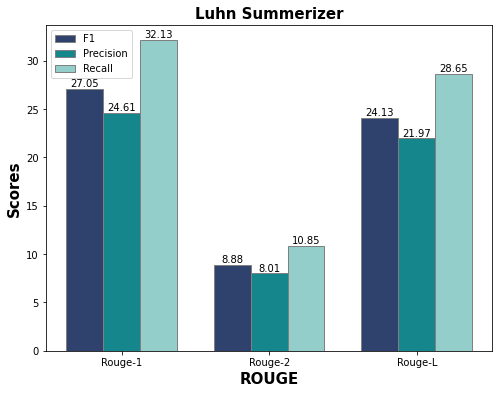

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))

# set height of bar
F1 = [27.05, 8.88, 24.13]
Precision = [24.61, 8.01, 21.97]
Recall = [32.13, 10.85, 28.65]
# Set position of bar on X axis
br1 = np.arange(len(F1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, F1, color ='#2F416D', width = barWidth,
        edgecolor ='grey', label ='F1')
plt.bar(br2, Precision, color ='#14868C', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br3, Recall, color ='#94CECA', width = barWidth,
        edgecolor ='grey', label ='Recall')


# Adding Xticks
plt.title('Luhn Summerizer', fontweight ='bold', fontsize = 15)
plt.xlabel('ROUGE', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(F1))],
        ['Rouge-1', 'Rouge-2', 'Rouge-L'])

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]+.25, y[i], ha='center')


def addlabels1(x, y):
    for i in range(len(x)):
        plt.text(i+0.25, y[i]+.25, y[i], ha='center')

def addlabels2(x, y):
    for i in range(len(x)):
        plt.text(i + .50, y[i]+.25, y[i], ha='center')


addlabels(br1, F1)
addlabels1(br2, Precision)
addlabels2(br3, Recall)

plt.legend()
plt.show()

In [ ]:
# from nltk.tokenize import sent_tokenize,word_tokenize
# import regex

# def tokenize_sentence(text):
#   sents=sent_tokenize(str(text)) 
#   sent_list=[]
#   for sent in sents:
#     sent=sent.strip()
#     sent=sent.lower()
#     # sent=remove_shortWord(sent) 
#     sent_list.append(sent)
#   return(sent_list)
# dataset['Luhn_summary']=dataset['Luhn_summary'].apply(lambda x: tokenize_sentence(x))
# dataset['abstract']=dataset['abstract'].apply(lambda x: tokenize_sentence(x))  

In [ ]:
dataset.head(5)

In [ ]:
dataset['Luhn_summary'][0]

In [ ]:
import nltk
nltk.download()

In [ ]:
dataset['Luhn_summary'] = dataset['Luhn_summary'].astype(str)
dataset['abstract'] = dataset['abstract'].astype(str) 


In [ ]:
import nltk
# from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu
# BLEUscore = nltk.translate.bleu_score.sentence_bleu(dataset['abstract'], dataset['Luhn_summary'])
BLEUscore = corpus_bleu(dataset['abstract'], dataset['Luhn_summary'])
print(BLEUscore)

In [ ]:
!pip3  install evaluate

In [ ]:
!pip3 install bert_score

In [ ]:
from evaluate import load
bertscore = load("bertscore")
# predictions = ["hello there", "general kenobi"]
# references = ["hello there", "general kenobi"]
results = bertscore.compute(predictions=dataset['Luhn_summary'], references=dataset['abstract'], lang="en")

In [ ]:
for i in range(0,10):
    print("Original text:",dataset['heuristic1'][i])
    print("Original summary:",dataset['abstract'][i])
    print("Predicted summary:",dataset['Luhn_summary'][i])
    print("\n")